# Régression linéaire sans utiliser de package python Assurance

## Import des packages

In [350]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install sklearn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import array
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

- Chargement des données

In [352]:
def load_data(name):
    df = pd.read_csv(name)
    return df

- préparation (filtrage) des colonnes

In [353]:
def prepare_data(df):
    columns=[]
    columns_category=[]
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            #print(f"La colonne '{col}' est numérique.")
            columns.append(col)
        else:
            #print(f"La colonne '{col}' n'est pas numérique.")
            columns_category.append(col)
    
    df_numeric = df[columns].astype(float)
    df_category = df[columns_category]
    return df_category, df_numeric

- transformation des catégories

In [354]:
def transform_data(data):
    encoder = OneHotEncoder()
    for col in data.columns:
        one_hot_array = encoder.fit_transform(data[[col]]).toarray()
        one_hot_df = pd.DataFrame(one_hot_array, columns = encoder.get_feature_names_out(), index = data.index)
        if col not in ("region"):
            data = pd.concat([data, one_hot_df.iloc[:,0]], axis=1).drop([col], axis=1)
        else:
            data = pd.concat([data, one_hot_df], axis=1).drop([col], axis=1)    
    return data           

- la normalisation (centrage et réduction)

In [428]:
def normalize_data(data, normalisation_code):
    """
    Normalise les données selon le code fourni.
    
    Args:
        data (pd.DataFrame): Données à normaliser.
        normalisation_code (int): Code de normalisation.
            - 0 : Standardisation manuelle (z-score).
            - 1 : StandardScaler.
            - 2 : MinMaxScaler.
    
    Returns:
        pd.DataFrame: Données normalisées.
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Les données doivent être un DataFrame Pandas.")
    
    if normalisation_code not in [0, 1, 2]:
        raise ValueError("Code de normalisation invalide. Utiliser 0, 1 ou 2.")
    
    if normalisation_code == 0:
        # Normalisation manuelle (z-score)
        for i in range(data.shape[1]):
            mu = data.iloc[:, i].mean()
            std = data.iloc[:, i].std()
            if std != 0:  # Éviter la division par zéro
                data.iloc[:, i] = (data.iloc[:, i] - mu) / std
            else:
                data.iloc[:, i] = 0  # Si la colonne est constante, tous les z-scores sont 0
    else:
        # Normalisation avec Scikit-learn
        if normalisation_code in [1, 2]:
            scaler = StandardScaler() if normalisation_code == 1 else MinMaxScaler()
            data_scaled = scaler.fit_transform(data)
            data = pd.DataFrame(data_scaled, columns=data.columns)
    
    return data


. calcul performance

In [356]:
def calcul_Performane(y_test, y_pred):
        # Évaluation du modèle
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return r2

- Affichage

In [357]:
def plot_performance(J_all, num_epochs):
	plt.xlabel('Modeles')
	plt.ylabel('R2')
	#plt.scatter(num_epochs, J_all,c ='red', marker = 'o' )
	plt.plot(num_epochs, J_all, 'm', linewidth = "1")
	plt.plot
	plt.show()

- modélisation des données

In [467]:
def model_data(data_X, data_cible_y, num_model):
    
    # Division des données en ensembles d'apprentissage et de test
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_cible_y, test_size=0.2, random_state=42)

    # Modèle basé sur la moyenne (DummyRegressor)
    if num_model == 0:
        model = DummyRegressor(strategy='mean')
        model.fit(X_train, y_train)   
    elif num_model == 1:
        model = LinearRegression().fit(X_train, y_train)
    elif num_model == 2:
        model = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)
    elif num_model == 3:
        model = Ridge(alpha=0.1).fit(X_train, y_train)
    elif num_model == 4:
        model = ElasticNet(random_state=0).fit(X_train, y_train)
    else:
        model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    r2 = calcul_Performane(y_test, y_pred)
    return r2


In [471]:
def RRF(data_X, data_cible_y): 

    X_train, X_test, y_train, y_test = train_test_split(data_X, data_cible_y, test_size=0.2, random_state=42)
    # Régression linéaire avec PolynomialFeatures
    poly = PolynomialFeatures(degree=2, include_bias=False)
    #scaler = StandardScaler()
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Modèle régression linéaire
    linear_model = LinearRegression()
    linear_model.fit(X_train_poly, y_train)
    y_pred_linear = linear_model.predict(X_test_poly)
    return(r2_score(y_test, y_pred_linear))

## Main Function

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
[('age',), ('bmi',), ('children',), ('sex_female',), ('smoker_no',), ('region_northeast',), ('region_northwest',), ('region_southeast',), ('region_southwest',)]
[('age', 'bmi'), ('age', 'children'), ('age', 'sex_female'), ('age', 'smoker_no'), ('age', 'region_northeast'), ('age', 'region_northwest'), ('age', 'region_southeast'), ('age', 'region_southwest'), ('bmi', 'children'), ('bmi', 'sex_female'), ('bmi', 'smoker_no'), ('bmi', 'region_northeast'), ('bmi', 'region_northwest'), ('bmi', 'region_southeast'), ('bmi', 'region_southwest'), ('children', 'sex_female'), ('children', 'smoker_no'), ('children', 'region_northeast'), ('children', 'region_northwest'), ('children', 'region_southeast'), ('children', 'region_southwest'), ('s

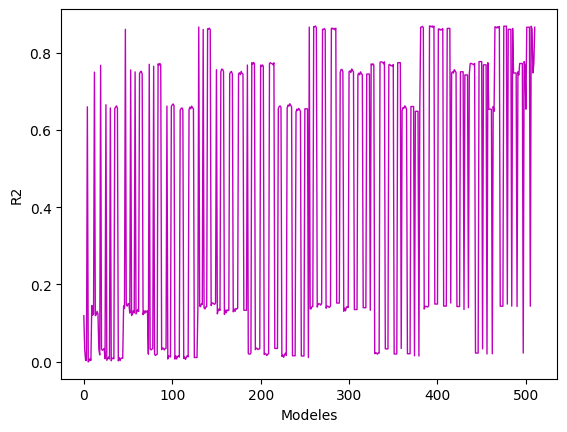

'\n            #print(df_subset_normalizes.shape)\n            #J_all = np.zeros((nombre_model, nombre_normalisation))\n            #print(J_all)\n\n# Vérifiez si les objets sont des tableaux NumPy et convertissez-les en DataFrame\nif isinstance(normalized_numeric, np.ndarray):\n    normalized_numeric = pd.DataFrame(normalized_numeric, columns=df_numeric.columns[:-1])\n\nif isinstance(normalized_category, np.ndarray):\n    normalized_category = pd.DataFrame(normalized_category, columns=transform_data(df_category).columns)\n\n#print(normalized_numeric.info())\nprint(normalized_category.info())\n\n# Concaténation après conversion\ndf_data_normalized = pd.concat([normalized_numeric, normalized_category], axis=1)\n#df_data_normalized = pd.concat([normalized_numeric[["bmi"]], normalized_category[["smoker_no"]]], axis=1)\n#df_data_normalized = normalized_category[["smoker_no"]]#pd.concat([normalized_numeric], axis=1)\nprint(df_data_normalized.info())\n#df_data_normalized = pd.concat([normali

In [472]:
import itertools


df = load_data("data_.csv")
df_category, df_numeric = prepare_data(df)
df_cible = df_numeric.iloc[:,-1]
df_numeric = df_numeric[df_numeric.columns[:-1]]
#print(df_numeric)
df_category_transforme = transform_data(df_category)
#print(df_category_transforme)

print(df_cible)
model_dict ={
      0:'DummyRegr',
      1:'LinearReg',
      2:'Lasso',
      3:'Ridge',
      4:'ElasticNet',
             }

combined_df = pd.concat([df_numeric, df_category_transforme], axis=1)
#print(combined_df.info())
# Afficher les colonnes combinées
#print(combined_df.columns)

columns = combined_df.columns
#print(columns)

performances=[]
n_epochs = []
count = 0

#df_subset_normalizes = normalize_data(combined_df, 0)
#performances.append(model_data(df_subset_normalizes, df_cible, 3))
#print(performances)
import csv

with open('results4.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["i", "j", "k", "l", "result"])  # En-têtes
                    

    for r in range(1, len(columns) + 1):  # Longueur des combinaisons, de 1 à nombre de colonnes
        combinaisons = list(itertools.combinations(columns, r))
        print(combinaisons)
        for combinaison in combinaisons:
            df_subset = combined_df[list(combinaison)]  # Sous-ensemble du DataFrame
            
            #for normalisation in range(3):# on utilise qu'une méthode de normalisation pour le moment
            #    df_subset_normalizes = normalize_data(df_subset, normalisation)
            df_subset_normalizes = normalize_data(df_subset, 1)


                #for methode_modelisation in range(6):#:# on utilise que deux méthode de modélisation linéaire pour le moment
            resultat = RRF(df_subset_normalizes, df_cible)
            performances.append(resultat)
            n_epochs.append(count)
            count +=1
            writer.writerow([r, combinaison, 1, 6, resultat])
        #performances.append(r2)
        #print(performances)
plot_performance(performances, n_epochs )
"""
            #print(df_subset_normalizes.shape)
            #J_all = np.zeros((nombre_model, nombre_normalisation))
            #print(J_all)

# Vérifiez si les objets sont des tableaux NumPy et convertissez-les en DataFrame
if isinstance(normalized_numeric, np.ndarray):
    normalized_numeric = pd.DataFrame(normalized_numeric, columns=df_numeric.columns[:-1])

if isinstance(normalized_category, np.ndarray):
    normalized_category = pd.DataFrame(normalized_category, columns=transform_data(df_category).columns)

#print(normalized_numeric.info())
print(normalized_category.info())

# Concaténation après conversion
df_data_normalized = pd.concat([normalized_numeric, normalized_category], axis=1)
#df_data_normalized = pd.concat([normalized_numeric[["bmi"]], normalized_category[["smoker_no"]]], axis=1)
#df_data_normalized = normalized_category[["smoker_no"]]#pd.concat([normalized_numeric], axis=1)
print(df_data_normalized.info())
#df_data_normalized = pd.concat([normalized_category], axis=1)

#df_data = pd.concat([(df_numeric[df_nsumeric.columns[:-1]]), transform_data(df_category) ], axis =1)




n_epochs = []
jplot = []
count = 0
#for j in 3:
for i in J_all:
	jplot.append(i)
	n_epochs.append(model_dict.get(count))
	count += 1
         
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_performance(jplot, n_epochs)
"""


. Utilisation de PolynomialFeatures pour améliorer les performances

In [466]:
# Chargement des données
#('age', 'bmi', 'children', 'smoker_no', 'region_northwest', 'region_southeast', 'region_southwest')
combined_df_selection = combined_df[['age', 'bmi', 'children', 'smoker_no', 'region_northwest', 'region_southeast', 'region_southwest']]
print(combined_df_selection.info)
combined_df_selection = normalize_data(combined_df_selection, 1)
X_train, X_test, y_train, y_test = train_test_split(combined_df_selection, df_cible, test_size=0.2, random_state=42)

# Régression linéaire avec PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
#scaler = StandardScaler()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Modèle régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)
y_pred_linear = linear_model.predict(X_test_poly)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Régression linéaire R2: {r2_linear:.3f}")

# Forêt aléatoire avec PolynomialFeatures
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_poly, y_train)
y_pred_rf = rf_model.predict(X_test_poly)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf= r2_score(y_test, y_pred_rf)
print(f"Forêt aléatoire R2: {r2_rf:.3f}")


<bound method DataFrame.info of            age       bmi  children  smoker_no  region_northwest  \
0    -1.438764 -0.453320 -0.908614  -1.970587         -0.566418   
1    -1.509965  0.509621 -0.078767   0.507463         -0.566418   
2    -0.797954  0.383307  1.580926   0.507463         -0.566418   
3    -0.441948 -1.305531 -0.908614   0.507463          1.765481   
4    -0.513149 -0.292556 -0.908614   0.507463          1.765481   
...        ...       ...       ...        ...               ...   
1333  0.768473  0.050297  1.580926   0.507463          1.765481   
1334 -1.509965  0.206139 -0.908614   0.507463         -0.566418   
1335 -1.509965  1.014878 -0.908614   0.507463         -0.566418   
1336 -1.296362 -0.797813 -0.908614   0.507463         -0.566418   
1337  1.551686 -0.261388 -0.908614  -1.970587          1.765481   

      region_southeast  region_southwest  
0            -0.611324          1.765481  
1             1.635795         -0.566418  
2             1.635795         -0.

. Utilisation des pipelines

In [460]:
#print(df.head())
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex','smoker']
ordinal_features = ['region']

df_cible = df.iloc[:,-1]
df_numeric = df[df.columns[:-1]]

df_numeric = df_numeric[['age', 'sex', 'bmi', 'children','smoker','region']]
print(df_numeric.head())
# Chargement des données
X_train, X_test, y_train, y_test = train_test_split(df_numeric, df_cible, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Normalisation des données numériques
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # Encodage des variables catégoriques
        ('ord', OrdinalEncoder(), ordinal_features)
    ], remainder='passthrough',
    )
print(preprocessor)
# Création d'un pipeline avec prétraitement et modèle
# Régression linéaire
lr_model = make_pipeline(preprocessor, PolynomialFeatures(2,), LinearRegression())
lr_model.fit(X_train, y_train)

# Forêt aléatoire
rf_model = make_pipeline(preprocessor, PolynomialFeatures(2,), RandomForestRegressor(random_state=42))
rf_model.fit(X_train, y_train)



   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['sex', 'smoker']),
                                ('ord', OrdinalEncoder(), ['region'])])


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['region'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [461]:
# Prédictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Score :", rf_model.score(X_test, y_test))

mse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Affichage des résultats
print("\nRésultats Régression Linéaire après Normalisation")
print("MSE :", mse_lr)
print("R² :", r2_lr)

print("\nRésultats Forêt Aléatoire après Normalisation")
print("MSE :", mse_rf)
print("R² :", r2_rf)

Score : 0.858706858422657

Résultats Régression Linéaire après Normalisation
MSE : 4531.0715005340535
R² : 0.867756671853774

Résultats Forêt Aléatoire après Normalisation
MSE : 4683.543636859814
R² : 0.858706858422657
